# Simple MNIST convnet

## Setup

In [1]:
import numpy as np
import keras
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Show evaluated model

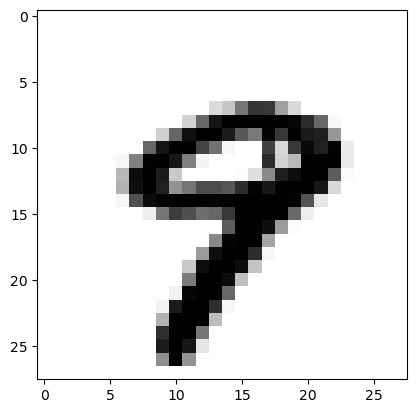

In [3]:
img = plt.imshow(1 - x_test[9])
img.set_cmap('gray')
#img = plt.imshow(x_test[1][:, :, 0], cmap='gray')

#plt.axis('off')
plt.show()

## Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the model

In [4]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 32s 74ms/step - loss: 0.3661 - accuracy: 0.8896 - val_loss: 0.0808 - val_accuracy: 0.9785
Epoch 2/5
422/422 [==============================] - 33s 77ms/step - loss: 0.1112 - accuracy: 0.9661 - val_loss: 0.0600 - val_accuracy: 0.9850
Epoch 3/5
422/422 [==============================] - 33s 78ms/step - loss: 0.0831 - accuracy: 0.9748 - val_loss: 0.0490 - val_accuracy: 0.9860
Epoch 4/5
422/422 [==============================] - 39s 92ms/step - loss: 0.0722 - accuracy: 0.9776 - val_loss: 0.0458 - val_accuracy: 0.9877
Epoch 5/5
422/422 [==============================] - 35s 82ms/step - loss: 0.0624 - accuracy: 0.9808 - val_loss: 0.0392 - val_accuracy: 0.9888


## Evaluate the trained model

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03416501358151436
Test accuracy: 0.9879000186920166


In [6]:
prediction = model.predict(x_test)
prediction[9]
#print(prediction)

313/313 [==============================] - 2s 5ms/step


array([2.0101295e-07, 2.5046409e-10, 3.1666225e-06, 8.2441642e-05,
       2.0480594e-04, 2.2876770e-06, 4.2874804e-10, 2.1552981e-03,
       1.2446424e-03, 9.9630713e-01], dtype=float32)